<a href="https://colab.research.google.com/github/omer38/DeepLearning/blob/main/LinearRegression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Example**

In [2]:
# import libraries
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)# makes all column

In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [5]:
y = 2*X + 1 + e

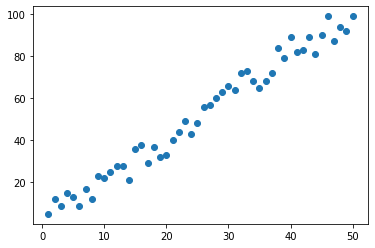

In [6]:
# We cannot plot tensorflow tensors so convert them to the numpy arrays.
plt.scatter(X.numpy(),y.numpy())

In [18]:
# Now define the Linear Regression Model
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear = nn.Linear(in_features,out_features)#Linear is the type of the layer it can also be conv or pool or..

  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred


In [19]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())#initiliazed values of the weight and biases
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [20]:
# Now set the loss function
criterion = nn.MSELoss()

In [21]:
#Set the optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [22]:
epochs = 50
losses = []
for i in range(epochs):
  i = i+1
  y_pred = model.forward(X)# create a prediction set by runnig X through current model parameters
  loss = criterion(y_pred,y)
  losses.append(loss)
  print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
  optimizer.zero_grad()# Gradients accumulate at every backprop we need to prevent it
  loss.backward()
  optimizer.step()#update the parameters of the model

epoch:  1  loss: 3057.21679688
epoch:  2  loss: 1588.53063965
epoch:  3  loss: 830.29992676
epoch:  4  loss: 438.85217285
epoch:  5  loss: 236.76144409
epoch:  6  loss: 132.42912292
epoch:  7  loss: 78.56572723
epoch:  8  loss: 50.75775909
epoch:  9  loss: 36.40123367
epoch: 10  loss: 28.98922920
epoch: 11  loss: 25.16238213
epoch: 12  loss: 23.18647385
epoch: 13  loss: 22.16612625
epoch: 14  loss: 21.63911057
epoch: 15  loss: 21.36677170
epoch: 16  loss: 21.22591782
epoch: 17  loss: 21.15294647
epoch: 18  loss: 21.11500931
epoch: 19  loss: 21.09517670
epoch: 20  loss: 21.08468437
epoch: 21  loss: 21.07901382
epoch: 22  loss: 21.07583046
epoch: 23  loss: 21.07393837
epoch: 24  loss: 21.07270050
epoch: 25  loss: 21.07181931
epoch: 26  loss: 21.07110596
epoch: 27  loss: 21.07048607
epoch: 28  loss: 21.06991386
epoch: 29  loss: 21.06936836
epoch: 30  loss: 21.06883812
epoch: 31  loss: 21.06830788
epoch: 32  loss: 21.06778145
epoch: 33  loss: 21.06726074
epoch: 34  loss: 21.06674004
epoch:

RuntimeError: ignored

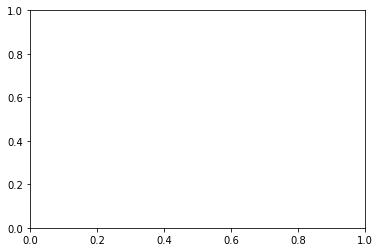

In [24]:
#Plot the epochs vs losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [26]:
x1 = x1 = np.array([X.min(),X.max()])
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


Text(0.5, 0, 'x')

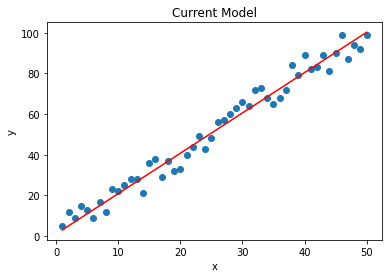

In [27]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')